# Customer Segmentation Project

## Importing Libraries and Data

In [1]:
import pandas as pd
import datetime
from datetime import date
from sklearn.impute import SimpleImputer 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
imblearn.__version__
%matplotlib inline

In [2]:
data = pd.read_csv('marketing_campaign.csv')

## Data Preprocessing 

In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### Changing the Dt_Customer into datetime format

In [4]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_14872\1730407249.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)
C:\Users\f5481198\AppData\Local\Temp\ipykernel_14872\1730407249.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)
C:\Users\f5481198\AppData\Local\Temp\ipykernel_14872\1730407249.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=True)
C:\Users\f5481198\AppData\Local\Temp\ipykernel_14872\1730407249.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. P

In [5]:
data['Dt_Customer'] 

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

#### Handling Missing Values

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data =data.dropna()
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Feature Engineering

#### Creating the Age feture from the Year_Birth Cplumn

In [8]:
def age(birth_year):
    return date.today().year - birth_year

data['Age'] = data['Year_Birth'].apply(age)


In [9]:
data['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

In [10]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,56
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,52
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,0,0,3,11,0,38
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,49
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,73


#### Creating the Customer_years feature from the Dt_Customer column

In [11]:
data['Year_joined']= data['Dt_Customer'].dt.year

In [12]:
data['Year_joined']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Year_joined, Length: 2216, dtype: int64

In [13]:
def years(year_joined):
    return date.today().year - year_joined

data['Customer_years'] = data['Year_joined'].apply(years)

In [14]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Year_joined,Customer_years
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,66,2012,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,69,2014,9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,2013,10
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,39,2014,9
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,2014,9


## Exploratory Data Analysis 

### Histograms

In [15]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Year_joined', 'Customer_years'],
      dtype='object')

In [16]:
data1= data.drop(columns=['Education','Marital_Status','ID','Year_Birth','Dt_Customer','Year_joined'])

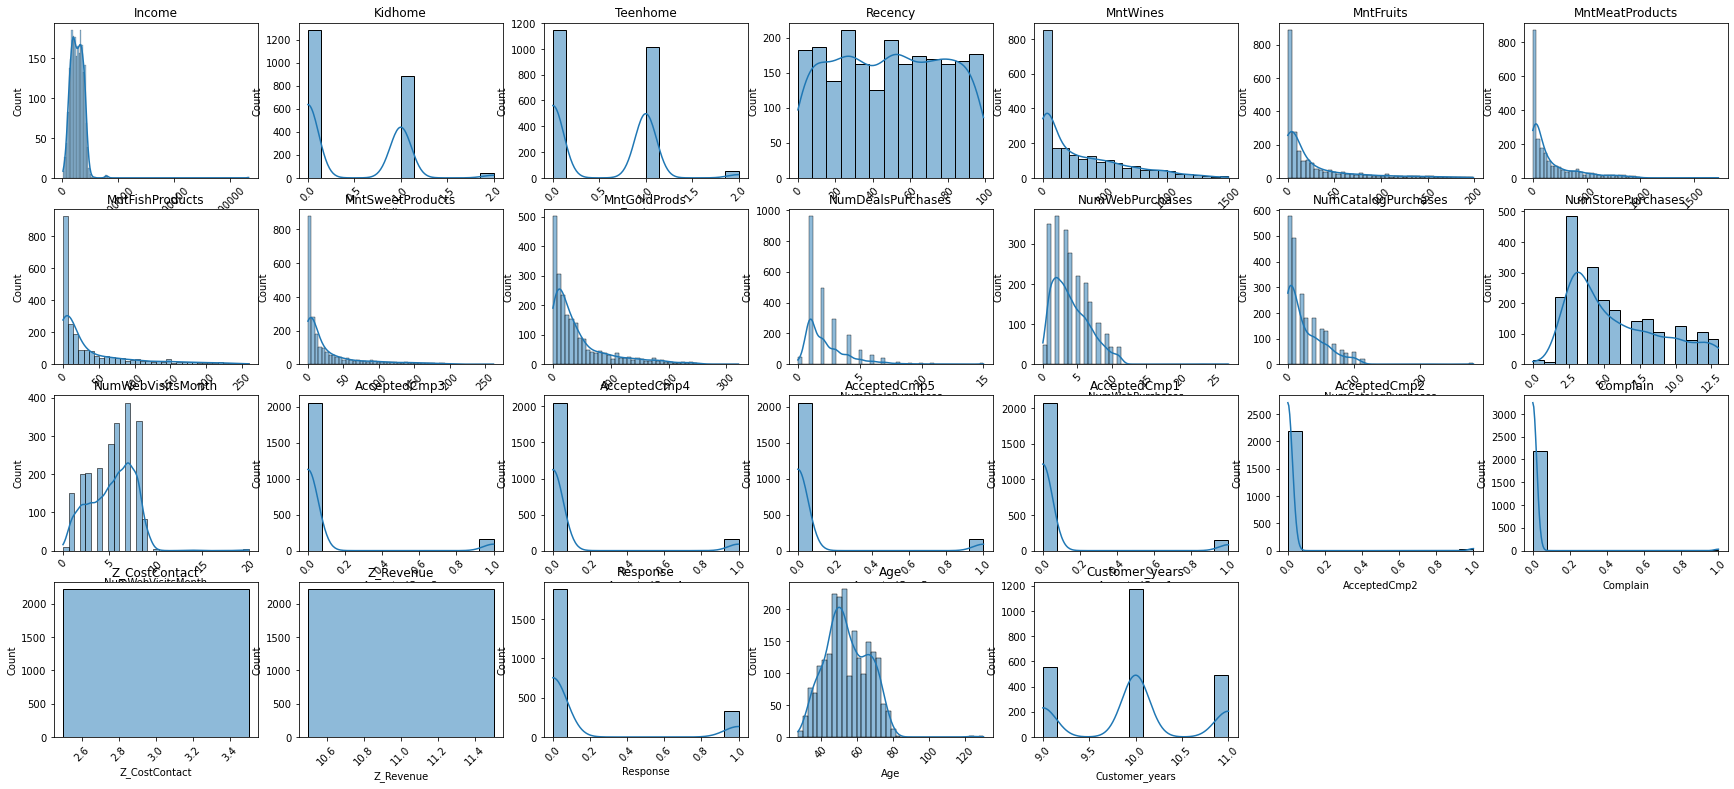

In [17]:
plt.figure(figsize=(30,20))
for i,col in enumerate(data1.columns,1):
    plt.subplot(6,7,i)
    sns.histplot(data1[col],kde =True)
    f= plt.gca()
    f.set_title(data1.columns.values[i-1])
    
    plt.xticks(rotation=45)

In [18]:
data2 = data[['Education','Marital_Status']]

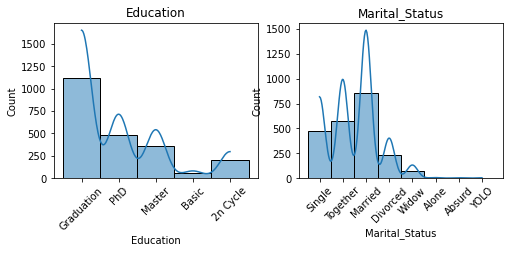

In [19]:
plt.figure(figsize=(30,20))
for i,col in enumerate(data2.columns,1):
    plt.subplot(6,7,i)
    sns.histplot(data2[col], kde= True)
    f= plt.gca()
    f.set_title(data2.columns.values[i-1])
    
    plt.xticks(rotation=45)

#### Correlation

In [20]:
corr = data1.corr()

C:\Users\f5481198\AppData\Local\Temp\ipykernel_14872\3599741671.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool


<AxesSubplot:>

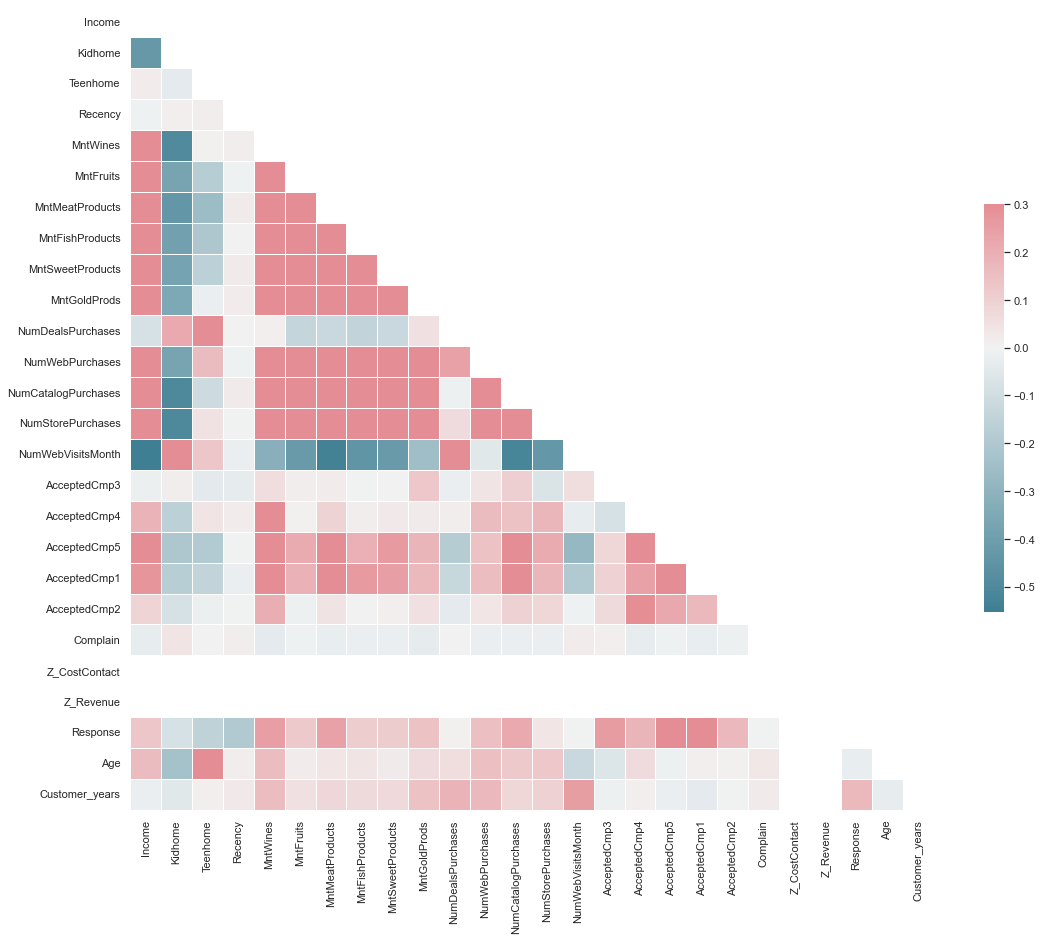

In [21]:
sns.set(style='white')
mask = np.zeros_like(corr,dtype=np.bool
                    )
mask[np.triu_indices_from(mask)]=True
f, ax =plt.subplots(figsize=(18,15))
cmap =sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [22]:
## Removing Correlated features

def correlation(data1,threshold):
    col_corr = set()
    corr_matrix= data1.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
                
    return col_corr

In [23]:
corr_features=correlation(data1,0.75)

In [24]:
len(set(corr_features))

0

#### Box Plot

C:\Users\f5481198\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\f5481198\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\f5481198\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\f5481198\Anac

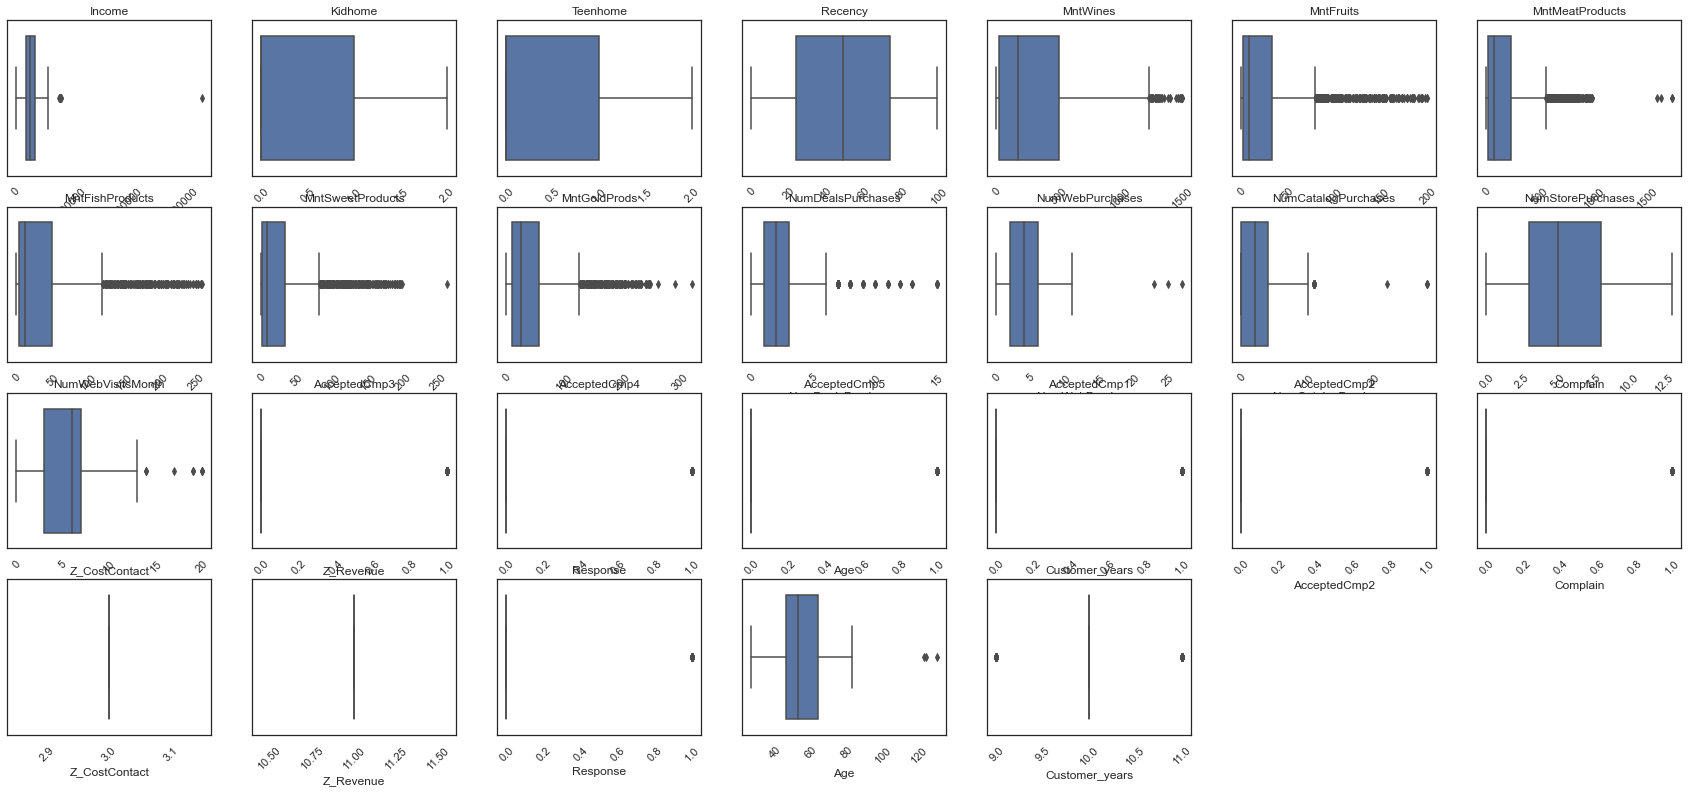

In [25]:
plt.figure(figsize=(30,20))
for i,col in enumerate(data1.columns,1):
    plt.subplot(6,7,i)
    sns.boxplot(data1[col])
    f= plt.gca()
    f.set_title(data1.columns.values[i-1])
    
    plt.xticks(rotation=45)

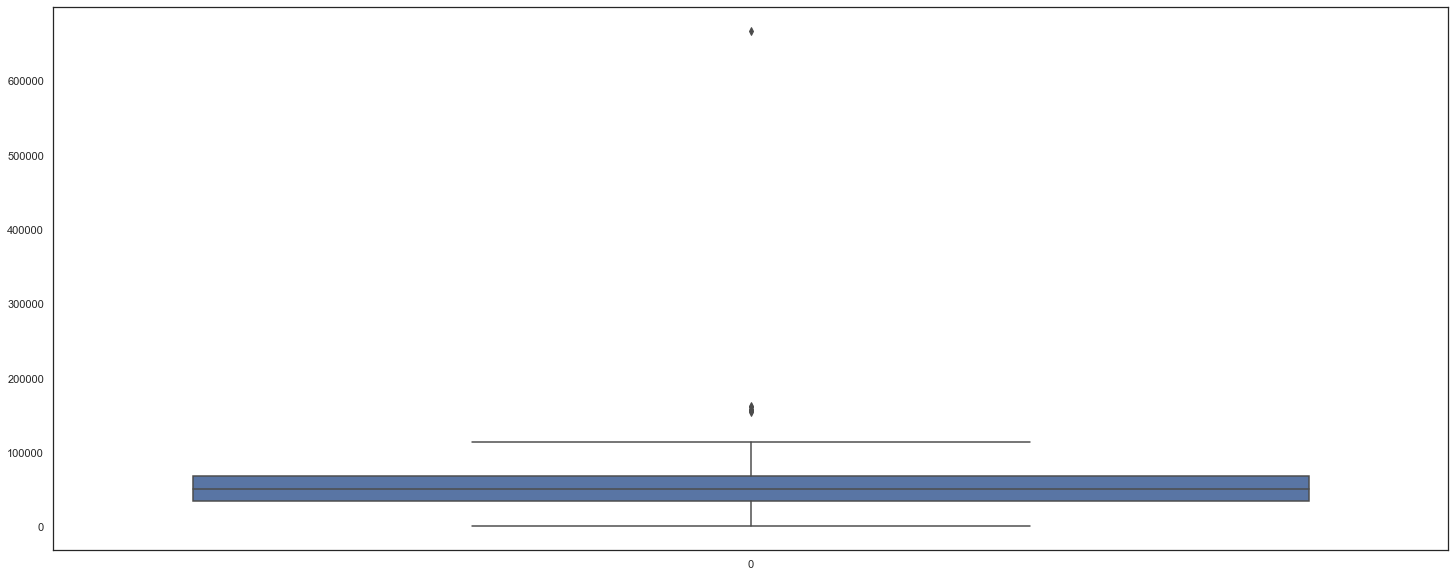

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(data=data1['Income'])
plt.show()

### One-hot Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Marital_Status']= le.fit_transform(data['Marital_Status'])
data['Education']= le.fit_transform(data['Marital_Status'])

In [28]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Year_joined,Customer_years
0,5524,1957,4,4,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,66,2012,11
1,2174,1954,4,4,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,69,2014,9
2,4141,1965,5,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,2013,10
3,6182,1984,5,5,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,39,2014,9
4,5324,1981,3,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,2014,9


#### Handing Outliers

In [29]:
data2= data.drop(columns=['ID','Year_Birth','Dt_Customer','Year_joined'])

In [30]:
data2.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_years
0,4,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,66,11
1,4,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,69,9
2,5,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,58,10
3,5,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,39,9
4,3,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,42,9


In [31]:
for col in data2.columns:
    if data2[col].skew()>0.5:
        data2[col] = np.log1p(data2[col])
        
    elif data2[col].skew()<-0.5:
        data2[col] = np.sqrt(data2[col])

#### Feature Scaling

In [32]:
X = data2.iloc[:,:].values

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

## Model Building

#### Using the elbow method to find the optimal number of clusters

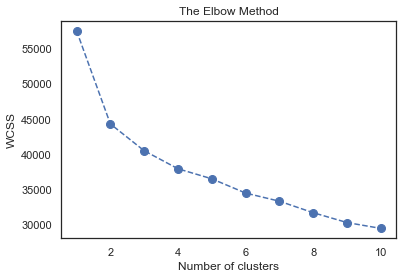

[57616.00000000001, 44327.4709708679, 40503.49356932004, 37932.54331177604, 36501.34759749525, 34467.91009202557, 33305.39219891479, 31666.105374271276, 30261.665061676023, 29427.580429635495]


In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker='o',linestyle='dashed', markersize=8)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print(wcss)

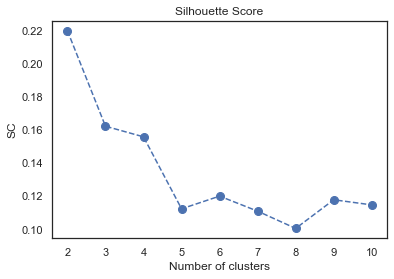

[0.219664905963276, 0.16210816092492528, 0.15570504567119522, 0.11230750137159866, 0.1199582584388628, 0.11088434937794539, 0.10048991433820706, 0.11776096898540779, 0.11467401517905719]


In [35]:
from sklearn.metrics import silhouette_score
sc=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    sc.append(silhouette_score(X,kmeans.labels_))
plt.plot(range(2,11), sc, marker='o',linestyle='dashed', markersize=8)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('SC')
plt.show()
print(sc)  

    

In [36]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 0 1 ... 1 1 0]


In [37]:
data2['Cluster_Labels'] = y_kmeans


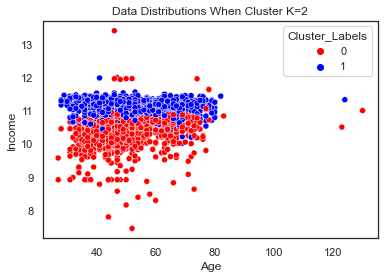

In [38]:
sns.scatterplot(x=data2['Age'],y=data2['Income'],hue=data2['Cluster_Labels'],palette=['Red','Blue'])
plt.title(f"Data Distributions When Cluster K=2")
plt.show()

#### Using the dendrogram to find the optimal number of clusters

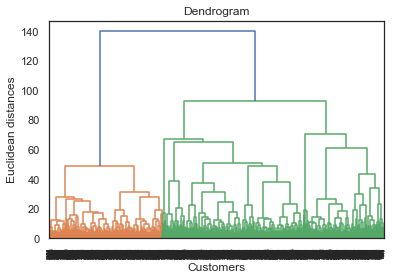

In [39]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity= 'euclidean', linkage='ward')
y_hc =hc.fit_predict(X)
print(y_hc)

[0 1 0 ... 2 2 2]


In [41]:
data2['Cluster_Labels'] = y_hc

In [42]:
data2['Cluster_Labels']

0       0
1       1
2       0
3       1
4       2
       ..
2235    2
2236    0
2237    2
2238    2
2239    2
Name: Cluster_Labels, Length: 2216, dtype: int64

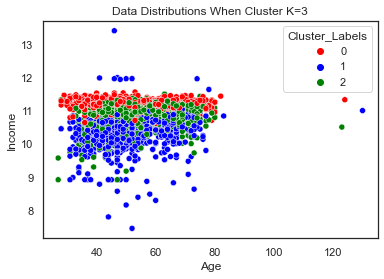

In [43]:
sns.scatterplot(x=data2['Age'],y=data2['Income'],hue=data2['Cluster_Labels'],palette=['Red','Blue','Green'])
plt.title(f"Data Distributions When Cluster K=3")
plt.show()